In [312]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [313]:
data = pd.read_csv('../artifacts/sentiment_analysis.csv')

In [314]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


## Data Preprocessing

In [315]:
data.shape

(7920, 3)

##### Ensure No Values Duplicated

In [316]:
data.duplicated().sum()

0

##### Ensure No Null Values Included

data.isnull().sum()

## Text Preprocessing

In [317]:
import re
import string

In [318]:
data["tweet"].head(10)

0    #fingerprint #Pregnancy Test https://goo.gl/h1...
1    Finally a transparant silicon case ^^ Thanks t...
2    We love this! Would you go? #talk #makememorie...
3    I'm wired I know I'm George I was made that wa...
4    What amazing service! Apple won't even talk to...
5    iPhone software update fucked up my phone big ...
6    Happy for us .. #instapic #instadaily #us #son...
7    New Type C charger cable #UK http://www.ebay.c...
8    Bout to go shopping again listening to music #...
9    Photo: #fun #selfie #pool #water #sony #camera...
Name: tweet, dtype: object

##### Convert uppercase to lowercase

In [319]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [320]:
data["tweet"].head(10)

0    #fingerprint #pregnancy test https://goo.gl/h1...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
5    iphone software update fucked up my phone big ...
6    happy for us .. #instapic #instadaily #us #son...
7    new type c charger cable #uk http://www.ebay.c...
8    bout to go shopping again listening to music #...
9    photo: #fun #selfie #pool #water #sony #camera...
Name: tweet, dtype: object

##### Remove links

In [321]:
data["tweet"] = data['tweet'].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE) for x in x.split()))

In [322]:
data["tweet"].head(10)

0    #fingerprint #pregnancy test  #android #apps #...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
5    iphone software update fucked up my phone big ...
6    happy for us .. #instapic #instadaily #us #son...
7    new type c charger cable #uk  … #bay #amazon #...
8    bout to go shopping again listening to music #...
9    photo: #fun #selfie #pool #water #sony #camera...
Name: tweet, dtype: object

##### Remove punctuations

In [323]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [324]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

data["tweet"] = data["tweet"].apply(remove_punctuations)

In [325]:
data["tweet"].head(10)

0    fingerprint pregnancy test  android apps beaut...
1    finally a transparant silicon case  thanks to ...
2    we love this would you go talk makememories un...
3    im wired i know im george i was made that way ...
4    what amazing service apple wont even talk to m...
5    iphone software update fucked up my phone big ...
6    happy for us  instapic instadaily us sony xper...
7    new type c charger cable uk  … bay amazon etsy...
8    bout to go shopping again listening to music i...
9    photo fun selfie pool water sony camera picoft...
Name: tweet, dtype: object

##### Remove numbers

In [326]:
data["tweet"].tail(5)

7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely 90 year old neighbor with he...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

In [327]:
data["tweet"] = data['tweet'].str.replace('\d+', '', regex=True)

##### Remove stopwords

In [328]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [329]:
import nltk

In [330]:
nltk.download('stopwords', download_dir='../static/model')

[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Package stopwords is already up-to-date!


True

In [331]:
with open('../static/model/corpora/stopwords/english', 'r') as stopwords_file:
    sw = stopwords_file.read().splitlines()

In [332]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [333]:
data["tweet"].head(10)

0    fingerprint pregnancy test android apps beauti...
1    finally transparant silicon case thanks uncle ...
2    love would go talk makememories unplug relax i...
3    im wired know im george made way iphone cute d...
4    amazing service apple wont even talk question ...
5    iphone software update fucked phone big time s...
6    happy us instapic instadaily us sony xperia xp...
7    new type c charger cable uk … bay amazon etsy ...
8    bout go shopping listening music iphone justme...
9    photo fun selfie pool water sony camera picoft...
Name: tweet, dtype: object

##### Stemming

In [334]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [335]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))

In [336]:
data["tweet"].head()

0    fingerprint pregnanc test android app beauti c...
1    final transpar silicon case thank uncl yay son...
2    love would go talk makememori unplug relax iph...
3    im wire know im georg made way iphon cute dave...
4    amaz servic appl wont even talk question unles...
Name: tweet, dtype: object

In [337]:
data

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,im wire know im georg made way iphon cute dave...
4,5,1,amaz servic appl wont even talk question unles...
...,...,...,...
7915,7916,0,live loud lol liveoutloud selfi smile soni mus...
7916,7917,0,would like wish amaz day make everi minut coun...
7917,7918,0,help love year old neighbor ipad morn made rea...
7918,7919,0,final got smart pocket wifi stay connect anyti...


# Building Vacabulary

In [338]:
from collections import Counter
wordlist = Counter()

In [339]:
wordlist

Counter()

In [340]:
for sentence in data['tweet']:
    wordlist.update(sentence.split())

In [341]:
len(wordlist)

15949

In [342]:
data.shape

(7920, 3)

In [343]:
tokens = []
for key in wordlist:
    if wordlist[key] > 10:
        tokens.append(key)

In [344]:
len(tokens)

1145

In [345]:
def save_vocabulary(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w', encoding="utf-8")
    file.write(data)
    file.close()

save_vocabulary(tokens, '../static/model/vocabulary.txt')

# Divide Dataset

In [346]:
X = data['tweet']
y = data['label']

In [347]:
!pip install scikit-learn


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [348]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [349]:
X_train.shape

(6336,)

In [350]:
X_test.shape

(1584,)

# Vectorization

In [351]:
def vectorizer(ds, vocabulary):
    vectorized_lst = []
    
    for sentence in ds:
        sentence_lst = np.zeros(len(vocabulary))
        
        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_lst[i] = 1
                
        vectorized_lst.append(sentence_lst)
        
    vectorized_lst_new = np.asarray(vectorized_lst, dtype=np.float32)
    
    return vectorized_lst_new

In [352]:
vectorized_x_train = vectorizer(X_train, tokens)

In [353]:
vectorized_x_test = vectorizer(X_test, tokens)

In [354]:
vectorized_x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [355]:
y_train

6168    1
7708    0
4103    0
2152    1
2877    0
       ..
7670    1
2707    0
430     1
2721    0
1983    0
Name: label, Length: 6336, dtype: int64

In [356]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [357]:
y_train.value_counts()

label
0    4702
1    1634
Name: count, dtype: int64

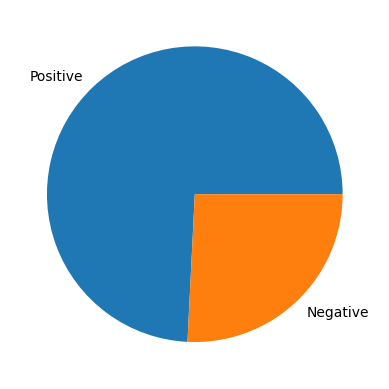

In [358]:
plt.pie(np.array([y_train.value_counts()[0], y_train.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

## Handle imbalanced dataset

In [359]:
!pip install imbalanced-learn


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [360]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train, y_train)
vectorized_x_test_smote, y_test_smote = smote.fit_resample(vectorized_x_test, y_test)
print(vectorized_x_train_smote.shape, y_train_smote.shape)
print(vectorized_x_test_smote.shape, y_test_smote.shape)

(9404, 1145) (9404,)
(2384, 1145) (2384,)


In [361]:
y_train_smote.value_counts()

label
1    4702
0    4702
Name: count, dtype: int64

In [362]:
y_test_smote.value_counts()

label
0    1192
1    1192
Name: count, dtype: int64

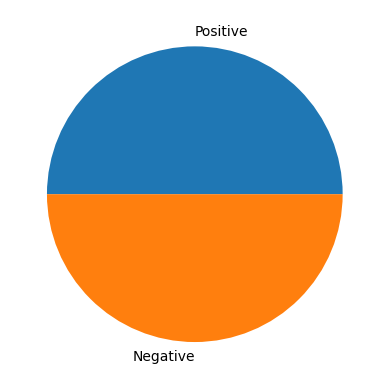

In [363]:

plt.pie(np.array([y_train_smote.value_counts()[0], y_train_smote.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

# Model Training and Evaluation

In [364]:
!pip install seaborn


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [365]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [366]:
import matplotlib.pyplot as plt
import seaborn as sns

In [367]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score,confusion_matrix, classification_report

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')
    
def validation_scores(y_act, y_pred):
    cm = confusion_matrix(y_act, y_pred)
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Testing Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')
    print('Confusion Matrix:')
    print(cm)
    print('\nClassification Report:')
    print(classification_report(y_act, y_pred))


    # Plot Confusion Matrix
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

### Logistic Regression

In [368]:
lr = LogisticRegression()
lr.fit(vectorized_x_train_smote, y_train_smote)

LogisticRegression()

In [369]:
y_train_pred = lr.predict(vectorized_x_train_smote)

In [370]:
y_test_pred=lr.predict(vectorized_x_test)

Training Scores:
	Accuracy = 0.939
	Precision = 0.917
	Recall = 0.967
	F1-Score = 0.941
Testing Scores:
	Accuracy = 0.858
	Precision = 0.677
	Recall = 0.814
	F1-Score = 0.739
Confusion Matrix:
[[1040  152]
 [  73  319]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.87      0.90      1192
           1       0.68      0.81      0.74       392

    accuracy                           0.86      1584
   macro avg       0.81      0.84      0.82      1584
weighted avg       0.87      0.86      0.86      1584



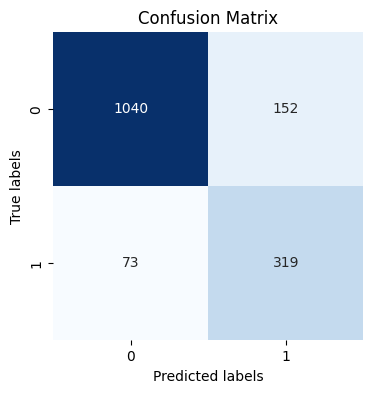

In [371]:
training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

### Naive Bayes

In [372]:
    mnb = MultinomialNB()
    mnb.fit(vectorized_x_train_smote, y_train_smote)

MultinomialNB()

In [373]:
y_train_pred = mnb.predict(vectorized_x_train_smote)

y_test_pred = mnb.predict(vectorized_x_test_smote)

Training Scores:
	Accuracy = 0.91
	Precision = 0.872
	Recall = 0.961
	F1-Score = 0.915
Testing Scores:
	Accuracy = 0.891
	Precision = 0.859
	Recall = 0.937
	F1-Score = 0.896
Confusion Matrix:
[[1008  184]
 [  75 1117]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.85      0.89      1192
           1       0.86      0.94      0.90      1192

    accuracy                           0.89      2384
   macro avg       0.89      0.89      0.89      2384
weighted avg       0.89      0.89      0.89      2384



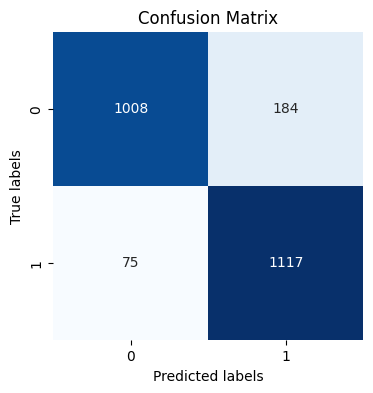

In [374]:
training_scores(y_train_smote, y_train_pred)

validation_scores(y_test_smote, y_test_pred)

### Decision Tree

In [375]:
dt = DecisionTreeClassifier()

dt.fit(vectorized_x_train_smote, y_train_smote)

DecisionTreeClassifier()

In [376]:
y_train_pred = dt.predict(vectorized_x_train_smote)

y_test_pred = dt.predict(vectorized_x_test_smote)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.84
	Precision = 0.855
	Recall = 0.82
	F1-Score = 0.837
Confusion Matrix:
[[1026  166]
 [ 215  977]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1192
           1       0.85      0.82      0.84      1192

    accuracy                           0.84      2384
   macro avg       0.84      0.84      0.84      2384
weighted avg       0.84      0.84      0.84      2384



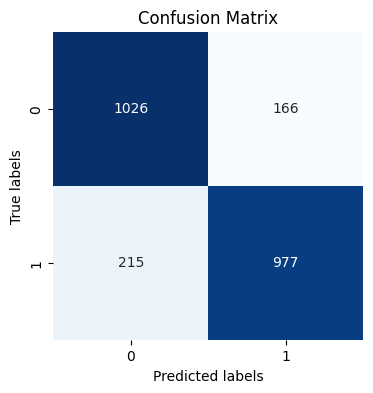

In [377]:
training_scores(y_train_smote, y_train_pred)

validation_scores(y_test_smote, y_test_pred)

### Random Forest

In [378]:
rf = RandomForestClassifier()

rf.fit(vectorized_x_train_smote, y_train_smote)

RandomForestClassifier()

In [379]:
y_train_pred = rf.predict(vectorized_x_train_smote)

y_test_pred = rf.predict(vectorized_x_test_smote)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.906
	Precision = 0.917
	Recall = 0.894
	F1-Score = 0.905
Confusion Matrix:
[[1095   97]
 [ 126 1066]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1192
           1       0.92      0.89      0.91      1192

    accuracy                           0.91      2384
   macro avg       0.91      0.91      0.91      2384
weighted avg       0.91      0.91      0.91      2384



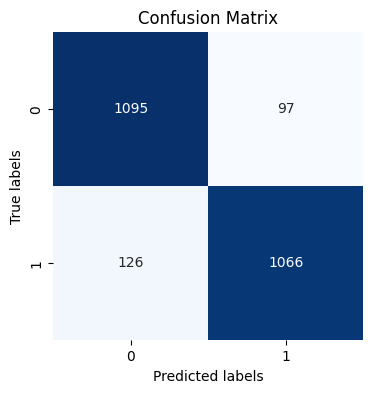

In [380]:
training_scores(y_train_smote, y_train_pred)

validation_scores(y_test_smote, y_test_pred)

### Support Vector Machine

In [381]:
svm = SVC()

svm.fit(vectorized_x_train_smote, y_train_smote)

SVC()

In [382]:
y_train_pred = svm.predict(vectorized_x_train_smote)

y_test_pred = svm.predict(vectorized_x_test_smote)

Training Scores:
	Accuracy = 0.979
	Precision = 0.962
	Recall = 0.996
	F1-Score = 0.979
Testing Scores:
	Accuracy = 0.895
	Precision = 0.898
	Recall = 0.892
	F1-Score = 0.895
Confusion Matrix:
[[1071  121]
 [ 129 1063]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.90      0.90      1192
           1       0.90      0.89      0.89      1192

    accuracy                           0.90      2384
   macro avg       0.90      0.90      0.90      2384
weighted avg       0.90      0.90      0.90      2384



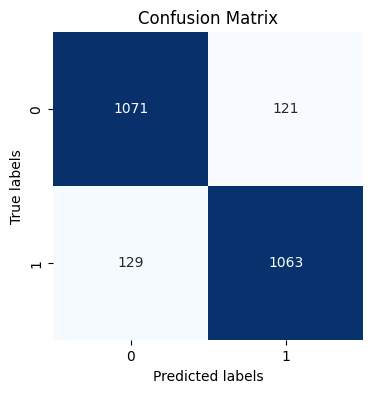

In [383]:
training_scores(y_train_smote, y_train_pred)

validation_scores(y_test_smote, y_test_pred)

## Compare Models

In [384]:
import pandas as pd

# Define the model names and their corresponding evaluation metrics
model_names = ['Logistic Regression', 'Multinomial Naive Bayes', 'Decision Tree', 'Random Forest', 'Support Vector Machine']
accuracies = [0.866, 0.86, 0.826, 0.861, 0.875]
precisions = [0.693, 0.664, 0.658, 0.737, 0.732]
recalls = [0.857, 0.916, 0.662, 0.711, 0.807]
f1_scores = [0.766, 0.77, 0.66, 0.724, 0.768]

# Create a dictionary to store the data
data = {
    'Model': model_names,
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1-Score': f1_scores
}

# Create a DataFrame from the dictionary
df = pd.DataFrame(data)

# Set the 'Model' column as the index
df.set_index('Model', inplace=True)

# Display the DataFrame
print(df)


                         Accuracy  Precision  Recall  F1-Score
Model                                                         
Logistic Regression         0.866      0.693   0.857     0.766
Multinomial Naive Bayes     0.860      0.664   0.916     0.770
Decision Tree               0.826      0.658   0.662     0.660
Random Forest               0.861      0.737   0.711     0.724
Support Vector Machine      0.875      0.732   0.807     0.768


In [385]:
import pandas as pd

# Define the model names and their corresponding evaluation metrics
model_names = ['Logistic Regression', 'Multinomial Naive Bayes', 'Decision Tree', 'Random Forest', 'Support Vector Machine']
training_accuracies = [0.941, 0.907, 1.0, 1.0, 0.978]
test_accuracies = [0.866, 0.86, 0.826, 0.861, 0.875]
precisions = [0.693, 0.664, 0.658, 0.737, 0.732]
recalls = [0.857, 0.916, 0.662, 0.711, 0.807]
f1_scores = [0.766, 0.77, 0.66, 0.724, 0.768]

# Create a dictionary to store the data
data = {
    'Model': model_names,
    'Accuracy': training_accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1-Score': f1_scores
}

# Create a DataFrame from the dictionary
df = pd.DataFrame(data)

# Set the 'Model' column as the index
df.set_index('Model', inplace=True)

# Display the DataFrame
print(df)


                         Accuracy  Precision  Recall  F1-Score
Model                                                         
Logistic Regression         0.941      0.693   0.857     0.766
Multinomial Naive Bayes     0.907      0.664   0.916     0.770
Decision Tree               1.000      0.658   0.662     0.660
Random Forest               1.000      0.737   0.711     0.724
Support Vector Machine      0.978      0.732   0.807     0.768


### Save Model

In [386]:
import pickle

with open('../static/model/model.pickle', 'wb') as file:
    pickle.dump(lr, file)